<a href="https://colab.research.google.com/github/ctarrington/try-python/blob/master/language-scraps/tuples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from collections import namedtuple
from itertools import islice

from matplotlib.pyplot import plot
from matplotlib import pyplot as plt

#Generators
Generators and lists are a little twitchy and the stakes are high

In [2]:
tuple_of_tuples = tuple( (x,y) for x in range(3) for y in range(2) )
print('Not a generator!!')
print(type(tuple_of_tuples), tuple_of_tuples)
print(type(tuple_of_tuples[0]), tuple_of_tuples[0])


Not a generator!!
<class 'tuple'> ((0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1))
<class 'tuple'> (0, 0)


In [3]:
# place the parenthese carefully or else!
pairs = (tuple((x,y)) for x in range(1_000_000_000_000) for y in range(5))
print(pairs)

<generator object <genexpr> at 0x7f4c4933f938>


lazy generation is the bomb! keep running the cell to see more


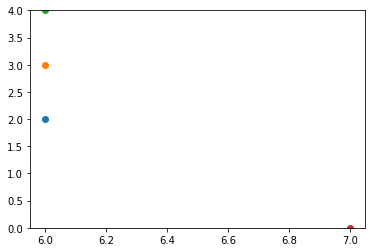

In [20]:
print('lazy generation is the bomb! keep running the cell to see more')
for pair in islice(pairs,4):
  plot(*pair, 'o')
plt.ylim(0, 4)
plt.show()

In [5]:
Pair = namedtuple('Pair', 'x y')
p = Pair(1,4)

npairs = (Pair(x=j,y=k) for j in range(1_000_000_000_000) for k in range(6) )
print(npairs)

<generator object <genexpr> at 0x7f4c4933fbf8>


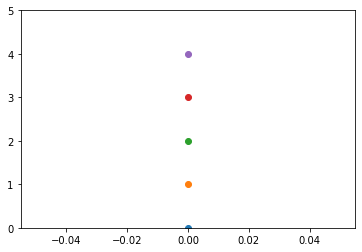

In [6]:
for pair in islice(npairs, 5):
  plot(pair.x, pair.y, 'o')
plt.ylim(0,5)
plt.show()

In [7]:
tuple_odds = (1,3,5,7) 
print('tuple_odds', tuple_odds)

tuple_odds (1, 3, 5, 7)


In [8]:
*one_three, five, seven = tuple_odds
print(one_three, five, seven)

[1, 3] 5 7


## Unpacking is pretty powerful

In [9]:
one, *three_five, seven = tuple_odds
print(one, three_five, seven)

1 [3, 5] 7


In [10]:
lookup = ('ted', (123, 456, 7890))
name, numbers = lookup
print(name)
print(numbers)

name, (code, prefix, number) = lookup
print('%s (%d)-%d-%d' % (name, code, prefix, number))

ted
(123, 456, 7890)
ted (123)-456-7890


# Slicing

In [11]:
tuple_evens = (2,4,6,8,10)
#  *two_four, six, *eight_ten = tuple_evens
#  nope: SyntaxError: two starred expressions in assignment

two_four, six, eight_ten = tuple_evens[:2], tuple_evens[2], tuple_evens[3:]
print(two_four, six, eight_ten)

(2, 4) 6 (8, 10)


# Named Slicing

In [12]:
ODDS = slice(1, 10, 2)

some_numbers = tuple(range(11))
odds = some_numbers[ODDS]
print(odds)



(1, 3, 5, 7, 9)


## Slicing on lazy things produces lazy things!!

In [27]:
lazy_numbers = range(11)
print(type(lazy_numbers), lazy_numbers)

lazy_odds = lazy_numbers[1:11:2]
print('lazy_odds', type(lazy_odds), lazy_odds)
print('take', tuple(lazy_odds))

<class 'range'> range(0, 11)
lazy_odds <class 'range'> range(1, 11, 2)
take (1, 3, 5, 7, 9)
